In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import pandas as pd

In [ ]:
df = pd.read_csv("/mnt/wines.csv")

In [ ]:
df.sample(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type,quality
2567,6.5,0.08,0.33,1.9,0.028,23.0,93.0,0.9910,3.34,0.70,12.0,white,7
4219,6.5,0.28,0.28,20.4,0.041,40.0,144.0,1.0002,3.14,0.38,8.7,white,5
36,7.8,0.60,0.14,2.4,0.086,3.0,15.0,0.9975,3.42,0.60,10.8,red,6


In [ ]:
y = df.quality.values
X = df.drop(columns=['quality','type'])

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
mse = mean_squared_error(df.quality.values, model.predict(X))
mse

0.5397154672776701

In [ ]:
X_sm = df[["fixed_acidity","volatile_acidity", "citric_acid", "residual_sugar","chlorides","free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol"]]
OLS = sm.OLS(df.quality.values, X_sm)
res = OLS.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          3.710e+04
Date:                Mon, 12 Jan 2026   Prob (F-statistic):                        0.00
Time:                        05:32:16   Log-Likelihood:                         -7226.4
No. Observations:                6497   AIC:                                  1.447e+04
Df Residuals:                    6486   BIC:                                  1.455e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed_acidity            0.0100      0.010      1.047      0.295      -0.009       0.029
volatile_acidity        -1.4573      0.072    -20.130      0.000      -1.599      -1.315
citric_acid             -0.1137      0.080     -1.426      0.154      -0.270       0.043
residual_sugar           0.0221      0.002      9.259      0.000       0.017       0.027
chlorides               -0.7955      0.326     -2.436      0.015      -1.436      -0.155
free_sulfur_dioxide      0.0060      0.001      7.966      0.000       0.005       0.007
total_sulfur_dioxide    -0.0022      0.000     -8.228      0.000      -0.003      -0.002
density                  1.9225      0.281      6.837      0.000       1.371       2.474
pH                       0.1641      0.069      2.384      0.017       0.029       0.299
sulphates                0.6408      0.071      8.998      0.000       0.501       0.780
alcohol                  0.3333      0.009     37.212      0.000       0.316       0.351
==============================================================================
Omnibus:                      140.142   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.565
Skew:                           0.010   Prob(JB):                     2.21e-68
Kurtosis:                       4.073   Cond. No.                     4.98e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Có thể thấy các feature có chỉ số |t| <= 2 không có tác động nhiều -> có thể skip các feature này:
*   fixed_acidity |t| < 2 & P-value > 0.05
*   citric_acid |t| < 2 & P-value > 0.05




In [ ]:
new_model = LinearRegression()
X_new = df.drop(columns = ["fixed_acidity", "citric_acid", "quality", "type"])
Y_new = df.quality.values
new_model.fit(X_new, Y_new)


LinearRegression()

In [ ]:
new_mse = mean_squared_error(Y_new, new_model.predict(X_new))
print(f"Old MSE (Trước khi drop các insignificant feature): {mse}\nNew MSE (đã drop các insignificant feature): {new_mse}")

Old MSE (Trước khi drop các insignificant feature): 0.5397154672776701
New MSE (đã drop các insignificant feature): 0.5412993989432143


### Exercise 2.2.
Titanic passengers data – 1310 observations and 15 variables:
```
passenger_id – Unique passenger id
pclass – Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
survived – Survival (0 = No, 1 = Yes)
name – Name and SUrname
sex – Sex (0 = Male, 1 = Female)
age – Age in years
sibsp – of siblings / spouses aboard the Titanic
parch – of parents / children aboard the Titanic
ticket – Ticket number
fare – Passenger fare
cabin – Cabin number
embarked – Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
boat – Lifeboat (if survived)
body – Body number (if did not survive and body was recovered)
home.dest – Home/Destination
```

estimate logistic regression model that can be used to
explain the probability of survival (survived = 1).

In [ ]:
import statsmodels.formula.api as smf

In [68]:
titanic = pd.read_csv("/mnt/titanic.csv")

Có một vài feature em nghĩ không nên dùng trong mô hình:
* passenger_id → chỉ là ID
* name → không có tính chất dự đoán
* ticket → phần lớn là nhiễu
* cabin → có quá nhiều null
* boat → chỉ xuất hiện nếu sống sót (data leakage)
* body → chỉ xuất hiện nếu qua đời (data leakage)
* home.dest → không có tính chất dự đoán

In [67]:
titanic.sample()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type,quality
6035,6.7,0.28,0.28,4.5,0.051,14.0,92.0,0.99224,3.36,0.58,11.9,white,6


In [69]:
model = smf.glm(formula = "survived ~ pclass + sex + age + sibsp + parch + fare + embarked", data = titanic, family = sm.families.Binomial())
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                 1043
Model:                            GLM   Df Residuals:                     1034
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -477.38
Date:                Mon, 12 Jan 2026   Deviance:                       954.75
Time:                        06:47:23   Pearson chi2:                 1.07e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3537
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.6050      0.464      5.613      0.000       1.695       3.515
embarked[T.Q]    -1.4465      0.445     -3.247      0.001      -2.320      -0.573
embarked[T.S]    -0.6791      0.212     -3.210      0.001      -1.094      -0.264
pclass           -1.0093      0.133     -7.563      0.000      -1.271      -0.748
sex               2.6089      0.179     14.550      0.000       2.258       2.960
age              -0.0377      0.007     -5.681      0.000      -0.051      -0.025
sibsp            -0.3480      0.108     -3.209      0.001      -0.561      -0.135
parch             0.0498      0.104      0.478      0.632      -0.154       0.254
fare              0.0005      0.002      0.239      0.811      -0.003       0.004
=================================================================================
"""

Có thể drop các feature như parch (coef = 0.0498, p = 0.632), fare (coef ≈ 0, p = 0.811)

-> Có thể thấy tỷ lệ nữ sống sót cao hơn nam gấp 23.6 (e^2.6089) lần, tuổi càng già đi một tuổi -> tỷ lệ sống sót giảm 3.7%, etc.

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(res.model.endog, (model.predict(res.params) >= 0.5).astype(int))

array([[527,  91],
       [127, 298]])

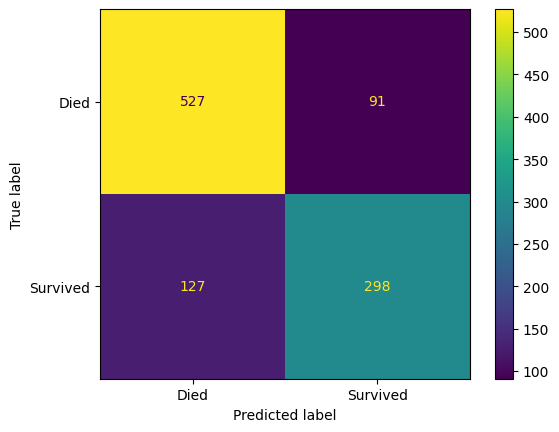

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(
    res.model.endog,
    (model.predict(res.params) > 0.5).astype(int)
)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Died", "Survived"]
)

disp.plot()
plt.show()
